In [82]:
from xgboost import XGBRegressor, DMatrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, median_absolute_error
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
params = {'max_depth':[5, 10, 15],
          'eta': [0.1, 0.2, 0.3, 0.5],
          'n_estimators': [100, 200],
          'min_child_weight':[1, 2, 5],
          'gamma': [1, 2, 5]}

In [3]:
train_X = pd.read_csv("./data/train/train_x.csv")
train_y = pd.read_csv("./data/train/train_y.csv", names =["y_train"])

In [4]:
xgbr = XGBRegressor(objective="reg:squarederror",
                    eval_metric='rmse',
                    num_round=30,
                    silent = 0)

In [5]:
model = GridSearchCV(estimator=xgbr,
                     param_grid=params,
                     scoring='neg_mean_absolute_error',
                     cv=10,
                     verbose=1,
                     n_jobs=-1)

In [6]:
model.fit(train_X.values, train_y.values)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  4.9min finished
C:\Users\DR25798\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, eval_metric='rmse', gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, num_round=30, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=0, subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [5, 10, 15], 'eta': [0.1, 0.2, 0.3, 0.5], 'n_estimators': [100, 200], 'min_child_weight': [1, 2, 5], 'gamma': [1, 2, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=1)

In [83]:
pickle.dump(model, open("xgb.pkl", "wb"))
# model = pickle.load(open("xgb.pkl", "rb"))

In [15]:
df_x = pd.read_csv("./data/test/test_x.csv")
df_y = pd.read_csv("./data/test/test_y.csv", names=["TVD"])

In [12]:
y_pred = model.predict(df_x.values) # model.predict(df_x[train_X.columns].values)

In [16]:
df = pd.concat([df_x, df_y], axis=1)

In [18]:
df["TVD_pred"] = y_pred

In [52]:
print(f"XGBoost MAE score: {np.round(mean_absolute_error(df.TVD, df.TVD_pred))}m")
print(f"XGBoost R2 socre: {np.round(r2_score(df.TVD, df.TVD_pred), 4)}")

XGBoost MAE score: 87.0m
XGBoost R2 socre: 0.9982


In [ ]:
df["model_error"] = df["TVD"] - df["TVD_pred"]

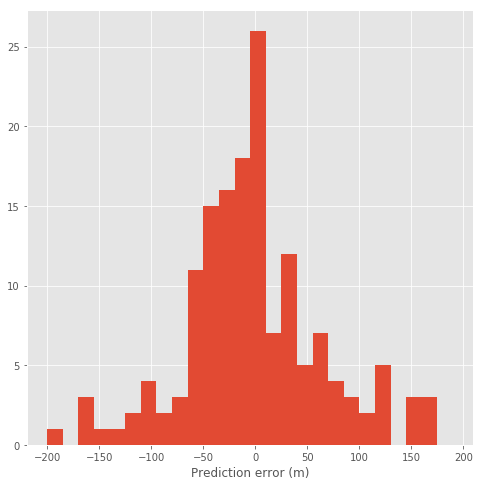

In [84]:
plt.style.use('ggplot')
plt.figure(figsize=(8, 8))
plt.hist(df["model_error"], bins=np.arange(-200, 200,15))
plt.xlabel("Prediction error (m)")
plt.show()

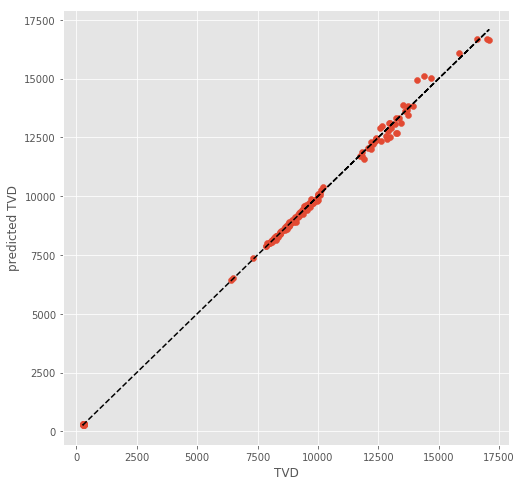

In [80]:
plt.figure(figsize=(8, 8))
plt.scatter(df.TVD, df.TVD_pred)
plt.plot(df.TVD, df.TVD, color="black", linestyle="--")
plt.xlabel("TVD")
plt.ylabel("predicted TVD")
plt.show()

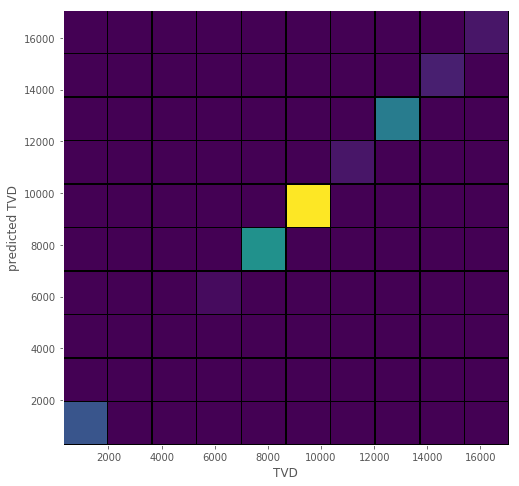

In [85]:
plt.figure(figsize=(8, 8))
plt.scatter(df.TVD, df.TVD_pred)
plt.hist2d(df.TVD, df.TVD, bi)
plt.xlabel("TVD")
plt.ylabel("predicted TVD")
plt.show()